**CICIDS2017 Dataset**
Wil Freeland

Description: Simulates real-world network traffic, including benign and malicious activities across multiple days with detailed flow features.

Project Idea: Develop a real-time intrusion detection system and evaluate its performance on various attack scenarios.

Source: https://www.unb.ca/cic/datasets/ids-2017.html

**Load and Inspect Data**

Dataset Description:
  
The CICIDS2017 dataset was created by the Canadian Institute for Cybersecurity to address the major holes in the existing intrusion detection area. While older datasets can lack realistic traffic and diverse attack types, CICIDS2017 was designed to resemble real-world enterprise network activity.

It was captured in July 2017 over 5 straight days and includes both benign traffic and a variety of more modern attack scenarios. These include DoS, DDoS, brute force attacks, infiltration, etc. Traffic was created using whats called a B-Profile system. This system simulates realistic human-like behaviors across protocols like HTTP, FTP, and email. Each of the network flows is labeled and includes over 80 extracted features which makes the data great for evaluating machine learning models for intrusion detection.

In [ ]:
import pandas as pd

# File path
df = pd.read_csv('/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# Quick preview
print(df.shape)
df.head()


(225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**Cleaning the Data**

- Stripped column names
- Dropped missing fields
- Removed infinite values
- Converted 'Label' column to binary (Attack vs. Benign)

In [ ]:
# Strip column names
df.columns = df.columns.str.strip()

# Drop irrelevant identifiers
df.drop(['Flow ID', 'Timestamp', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol'], axis=1, errors='ignore', inplace=True)

# Drop nulls
df.dropna(axis=1, how='all', inplace=True)
df.dropna(inplace=True)

# Handle infinities
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Binary label
df['Label'] = df['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')


**Model Setup (PyCaret)**

- Used PyCaret's setup() for classification
- Normalized data
- Define target column 'Label'

In [ ]:
!pip install pycaret
from pycaret.classification import *

clf = setup(data=df, target='Label', session_id=123, normalize=True)



,Description,Value
0,Session id,123
1,Target,Label
2,Target type,Binary
3,Target mapping,"Attack: 0, Benign: 1"
4,Original data shape,"(225711, 79)"
5,Transformed data shape,"(225711, 79)"
6,Transformed train set shape,"(157997, 79)"
7,Transformed test set shape,"(67714, 79)"
8,Numeric features,78
9,Preprocess,True


**Compare Models**


In [ ]:
best_model = compare_models(include=['rf', 'xgboost', 'lightgbm', 'dt', 'et'])



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9999,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,6.0990
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,13.7480
rf,Random Forest Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9997,0.9997,27.4200
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9997,0.9997,3.4500
et,Extra Trees Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,14.2480


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
pull()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9999,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,6.099
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,13.748
rf,Random Forest Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9997,0.9997,27.420
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9997,0.9997,3.450
et,Extra Trees Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,14.248


**Evaluate Model**

- Used evaluate_model() for visuals
- Plotted confusion matrix and feature importance

In [ ]:
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

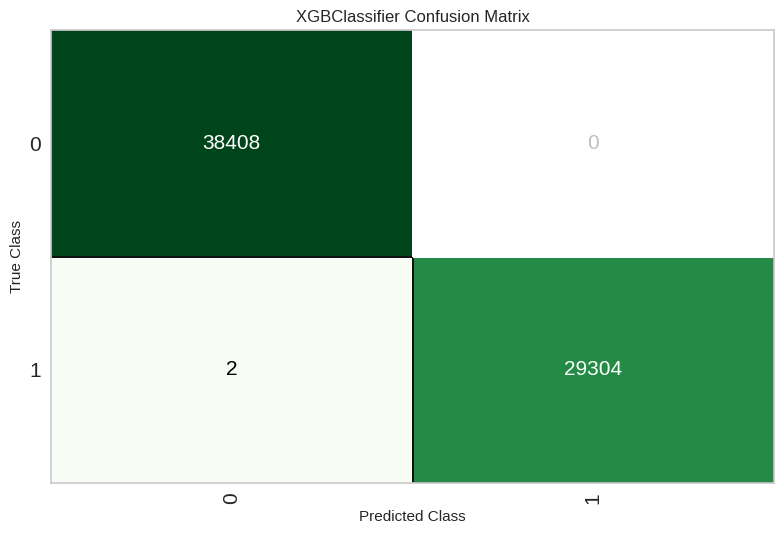

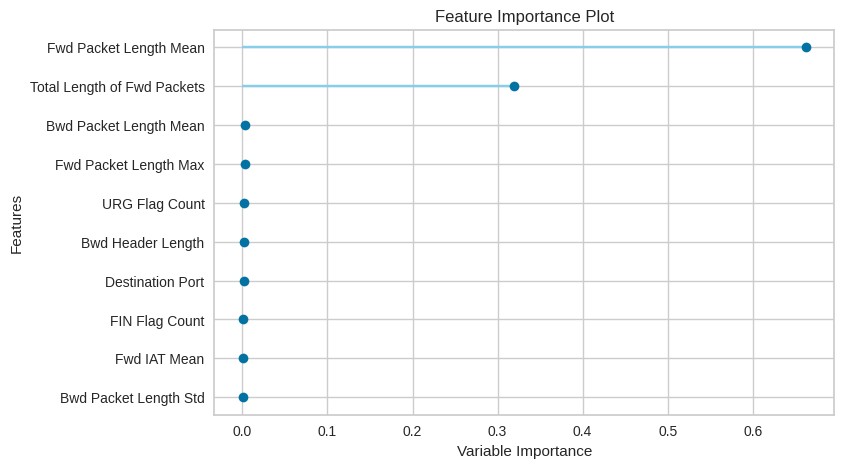

In [ ]:
plot_model(best_model, plot='confusion_matrix')

plot_model(best_model, plot='feature')



**Save Best Model**

In [ ]:
save_model(best_model, 'cicids2017_bestmodel')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Destination Port',
                                              'Flow Duration',
                                              'Total Fwd Packets',
                                              'Total Backward Packets',
                                              'Total Length of Fwd Packets',
                                              'Total Length of Bwd Packets',
                                              'Fwd Packet Leng...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_th

**Results Summary**

 Based on the performance metrics from PyCaret's model comparison, Extreme Gradient Boosting (XGBoost) was, by a thin margin, the top-performing model for detecting network intrusions in the CICIDS2017 dataset. It had near-perfect scores across all key metrics, including accuracy at 0.9999, recall at 0.9999, precision at 0.9999, F1 Score at 0.9999, and AUC at 1.0000. This shows a strong ability to correctly identify both benign and malicious traffic. LightGBM closely followed XGBoost with identical scores but slightly longer training time. While Random Forest, Decision Tree, and Extra Trees models also performed very well, XGBoost offered the best balance of accuracy and training time (6.1 seconds). This makes it the most efficient and effective model for this intrusion detection task.